In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [112]:
df = pd.read_csv('../../../datasets/data_science_job.csv')
df.sample(7)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
12869,6644,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,Other,20.0,NaN,NaN,20.0,1.0
18248,15893,city_103,0.920,Female,No relevent experience,no_enrollment,Graduate,STEM,20.0,10000+,Pvt Ltd,5.0,0.0
15161,2072,city_114,0.926,Male,Has relevent experience,no_enrollment,High School,NaN,15.0,100-500,Pvt Ltd,6.0,0.0
2003,18076,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,5.0,100-500,Funded Startup,73.0,0.0
12171,6983,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,6.0,10/49,Funded Startup,68.0,0.0
16974,10156,city_16,0.910,Male,No relevent experience,no_enrollment,NaN,NaN,1.0,NaN,NaN,202.0,0.0
18963,15235,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,Pvt Ltd,60.0,0.0


In [113]:
df.isnull().mean() * 100 

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [114]:
def CCAcolumns(df) :
    cca = []
    for col in df.columns : 
        if df[col].isnull().sum() and df[col].isnull().mean()* 100 < 5 : 
            cca.append(col)
    return cca

ccaCOLS = CCAcolumns(df)
ccaCOLS

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [115]:
len(df[ccaCOLS].dropna())/len(df)

0.8968577095730244

In [116]:
new_df = df.dropna()
print(df['education_level'].value_counts())
new_df['education_level'].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64


education_level
Graduate    5889
Masters     2304
Phd          241
Name: count, dtype: int64

np.int64(460)

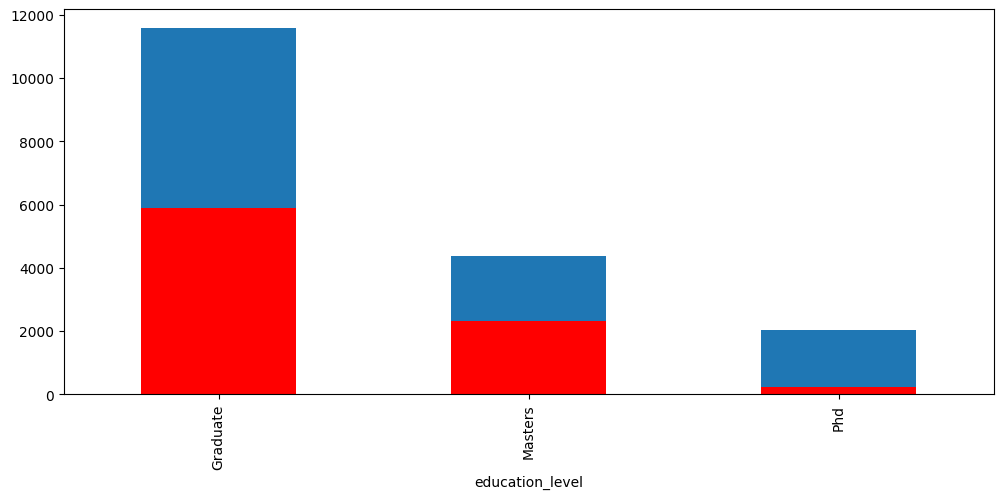

In [117]:
# education_level

df['education_level'].value_counts().plot(kind = 'bar' , label = 'Before cca' , figsize=(12,5))


new_df['education_level'].value_counts().plot(kind = 'bar' , label = 'After cca' , color = 'red', figsize=(12,5))


df['education_level'].isnull().sum()

In [118]:
df['city_development_index'].isnull().mean()*100

np.float64(2.5002609875769912)

<Axes: >

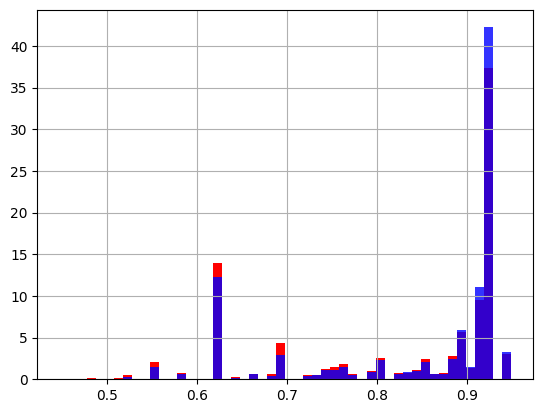

In [119]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['city_development_index'].hist(bins = 50 ,ax = ax , density = True , color = 'red')

new_df['city_development_index'].hist(bins = 50  , ax = ax , density = True ,color = 'blue' , alpha = 0.8)